<a href="https://colab.research.google.com/github/ShivaAtom/AI-Practices/blob/main/LSTMPredecirLetra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
text = 'Hola como estan'

# **Programa**

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

In [ ]:
text = text.lower()
ar_text = list(text)
alfabeto = list(set(text))
print(ar_text)
print(alfabeto)

['h', 'o', 'l', 'a', ' ', 'c', 'o', 'm', 'o', ' ', 'e', 's', 't', 'a', 'n']
['h', 'a', 'n', 'o', 'l', 'm', 's', 't', 'c', 'e', ' ']


In [ ]:
char_a_ind ={}
ind_a_char ={}

In [ ]:
etiqueta = np.arange(len(alfabeto))
size_text = len(alfabeto)
formato = tf.one_hot(etiqueta,size_text)

for i,vec in enumerate(formato):
  char_a_ind[alfabeto[i]] = vec

char_a_ind

{'h': <tf.Tensor: shape=(11,), dtype=float32, numpy=array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>,
 'a': <tf.Tensor: shape=(11,), dtype=float32, numpy=array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>,
 'n': <tf.Tensor: shape=(11,), dtype=float32, numpy=array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>,
 'o': <tf.Tensor: shape=(11,), dtype=float32, numpy=array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>,
 'l': <tf.Tensor: shape=(11,), dtype=float32, numpy=array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)>,
 'm': <tf.Tensor: shape=(11,), dtype=float32, numpy=array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)>,
 's': <tf.Tensor: shape=(11,), dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)>,
 't': <tf.Tensor: shape=(11,), dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)>,
 'c': <tf.Tensor: shape=(11,), d

In [ ]:
x_train=[]
y_train=[]
aux=[]
for i in range(len(text)-1):
  aux.append(text[i])
  aux.append(text[i+1])
  x_train.append(aux)
  aux=[]
x_train.pop()
print(x_train)
for i in range(len(text)):
  if i != 1 and i != 0:
    y_train.append(text[i])
print(y_train)

[['h', 'o'], ['o', 'l'], ['l', 'a'], ['a', ' '], [' ', 'c'], ['c', 'o'], ['o', 'm'], ['m', 'o'], ['o', ' '], [' ', 'e'], ['e', 's'], ['s', 't'], ['t', 'a']]
['l', 'a', ' ', 'c', 'o', 'm', 'o', ' ', 'e', 's', 't', 'a', 'n']


In [ ]:
def conversion(diccionario, array):
  aux=[]
  for val in array:
    aux.append(diccionario[val])
  return aux

In [ ]:
Y = conversion(char_a_ind, y_train)
X = []
for i in x_train:
  X.append(conversion(char_a_ind,i))

In [ ]:
Y = np.array(Y)
X = np.array(X)
len(X[0])

2

In [ ]:
modelo = keras.Sequential([
    keras.layers.Input(shape=(len(X[0]),len(X[0][0]))),
    keras.layers.LSTM(64),
    keras.layers.Dense(len(X[0][0]),activation='softmax')
])

In [ ]:
modelo.compile(
    optimizer='adam',
    loss=keras.losses.categorical_crossentropy,
    metrics=[keras.metrics.binary_accuracy]
)

In [ ]:
his = modelo.fit(X,Y,epochs=600,verbose=False)

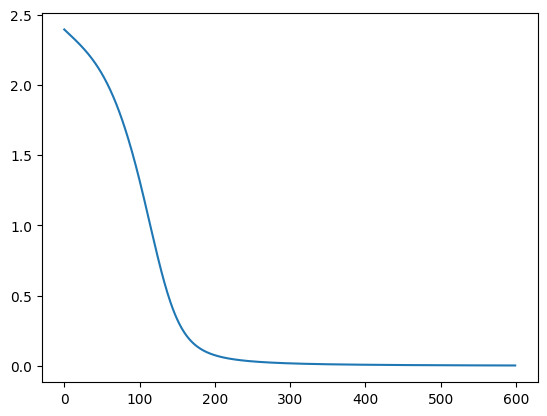

In [ ]:
plt.plot(his.history['loss'])

# **Testeo**

In [ ]:
test = 'co'

In [ ]:
test= list(test)
arr_test = conversion(char_a_ind,test)
arr_test = np.array([arr_test])

res = modelo.predict(arr_test)

1/1 [==============================] - 0s 365ms/step


In [ ]:
testeo = np.array(res[0])

indice_max = np.argmax(testeo)
nuevo_array=np.zeros_like(testeo)
nuevo_array[indice_max]= 1
for i,val in enumerate(alfabeto):
  print(f'{val}:{int(nuevo_array[i])}')

h:0
a:0
n:0
o:0
l:0
m:1
s:0
t:0
c:0
e:0
 :0
